In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data = pd.read_csv('water-quality-1.csv')

<ipython-input-3-e3074ca06c3e>:1: DtypeWarning: Columns (18) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('water-quality-1.csv')


In [4]:
data.head()

,Sample ID,Grab ID,Profile ID,Sample Number,Collect DateTime,Depth (m),Site Type,Area,Locator,Site,...,MDL,RDL,Text Value,Sample Info,Steward Note,Replicates,Replicate Of,Method,Date Analyzed,Data Source
0,16316,16316.0,10702,9209019,04/13/1992 12:00:00 AM,1.0,Streams and Rivers,Pipers,KSHZ06,Pipers Creek mouth,...,NaN,NaN,.070||King County Nstream Database/B53311,NaN,NaN,NaN,NaN,none,NaN,KCEL
1,8937,8937.0,37688,7915489,06/20/1979 12:00:00 AM,1.0,Streams and Rivers,Crisp,0321,Crisp Creek mouth at SE Green Valley Rd,...,NaN,NaN,.727||King County Nstream Database/RS2,NaN,NaN,NaN,NaN,NaN,NaN,KCEL
2,137745,137745.0,54368,L58228-1,06/25/2013 08:09:00 AM,1.0,Large Lakes,Lake Union/Ship Canal,0512,Ship Canal above locks,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,HYDROLAB,06/25/2013,KCEL
3,131816,131816.0,50605,L55068-6,02/13/2012 09:38:00 AM,1.0,Large Lakes,Lake Union/Ship Canal,0540,Ship Canal near Montlake Bridge,...,0.002,0.005,NaN,NaN,NaN,NaN,NaN,SM4500-P-F,02/15/2012,KCEL
4,82325,82325.0,43896,L52933-87,03/30/2011 02:36:00 PM,4.2,Large Lakes,Lake Washington,0804,Lake Washington north end,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,HYDROLAB,NaN,KCEL


In [25]:
data.columns

Index(['Sample ID', 'Grab ID', 'Profile ID', 'Sample Number',
       'Collect DateTime', 'Depth (m)', 'Site Type', 'Area', 'Locator', 'Site',
       'Parameter', 'Value', 'Units', 'QualityId', 'Lab Qualifier', 'MDL',
       'RDL', 'Text Value', 'Sample Info', 'Steward Note', 'Replicates',
       'Replicate Of', 'Method', 'Date Analyzed', 'Data Source'],
      dtype='object')

In [6]:
data.shape

(33117, 25)

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33117 entries, 0 to 33116
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Sample ID         33117 non-null  int64  
 1   Grab ID           23357 non-null  float64
 2   Profile ID        33117 non-null  int64  
 3   Sample Number     33117 non-null  object 
 4   Collect DateTime  33117 non-null  object 
 5   Depth (m)         23357 non-null  float64
 6   Site Type         33117 non-null  object 
 7   Area              33116 non-null  object 
 8   Locator           33117 non-null  object 
 9   Site              33117 non-null  object 
 10  Parameter         33117 non-null  object 
 11  Value             30296 non-null  float64
 12  Units             33085 non-null  object 
 13  QualityId         33117 non-null  int64  
 14  Lab Qualifier     3893 non-null   object 
 15  MDL               15789 non-null  float64
 16  RDL               15759 non-null  float6

In [17]:
data.isnull().sum()

Sample ID               0
Grab ID              9760
Profile ID              0
Sample Number           0
Collect DateTime        0
Depth (m)            9760
Site Type               0
Area                    1
Locator                 0
Site                    0
Parameter               0
Value                2821
Units                  32
QualityId               0
Lab Qualifier       29224
MDL                 17328
RDL                 17358
Text Value          26932
Sample Info         33039
Steward Note        33094
Replicates          33090
Replicate Of        33078
Method               5196
Date Analyzed       18622
Data Source             1
dtype: int64

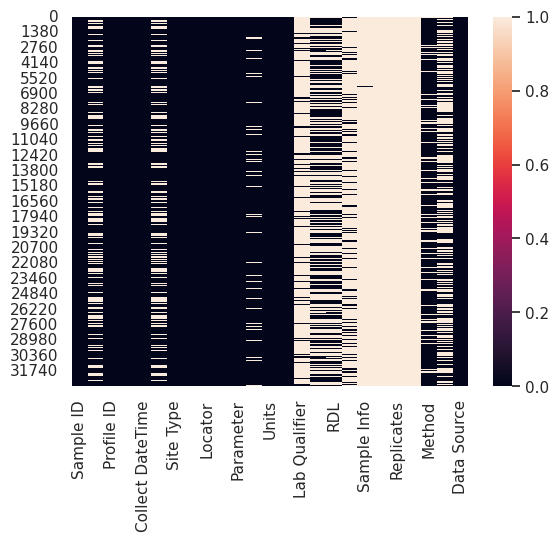

In [19]:
sns.heatmap(data.isnull())
plt.show()

In [15]:
data.duplicated().sum()

0

In [7]:
sns.set(style="whitegrid")

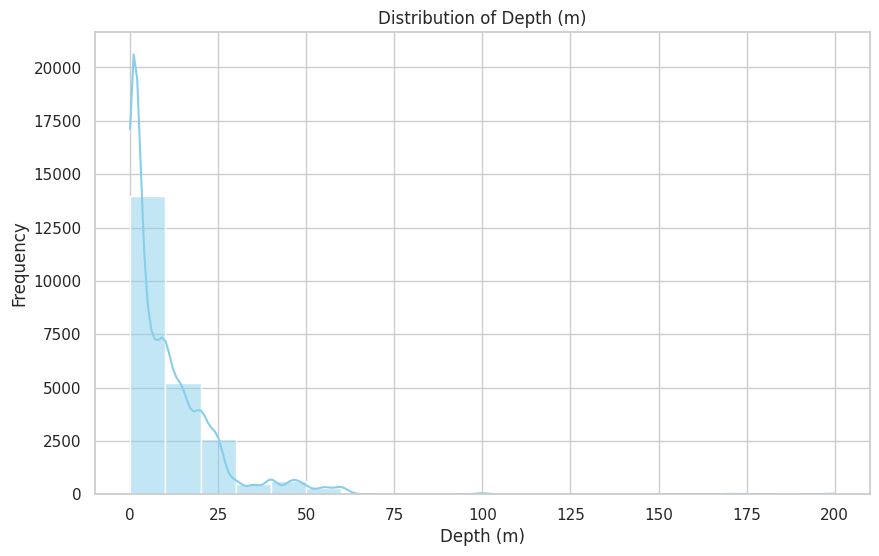

In [8]:
plt.figure(figsize=(10, 6))
sns.histplot(data['Depth (m)'], bins=20, kde=True, color='skyblue')
plt.title('Distribution of Depth (m)')
plt.xlabel('Depth (m)')
plt.ylabel('Frequency')
plt.show()

<ipython-input-9-3478fdd2f3c7>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x='Site Type', palette='Set2')


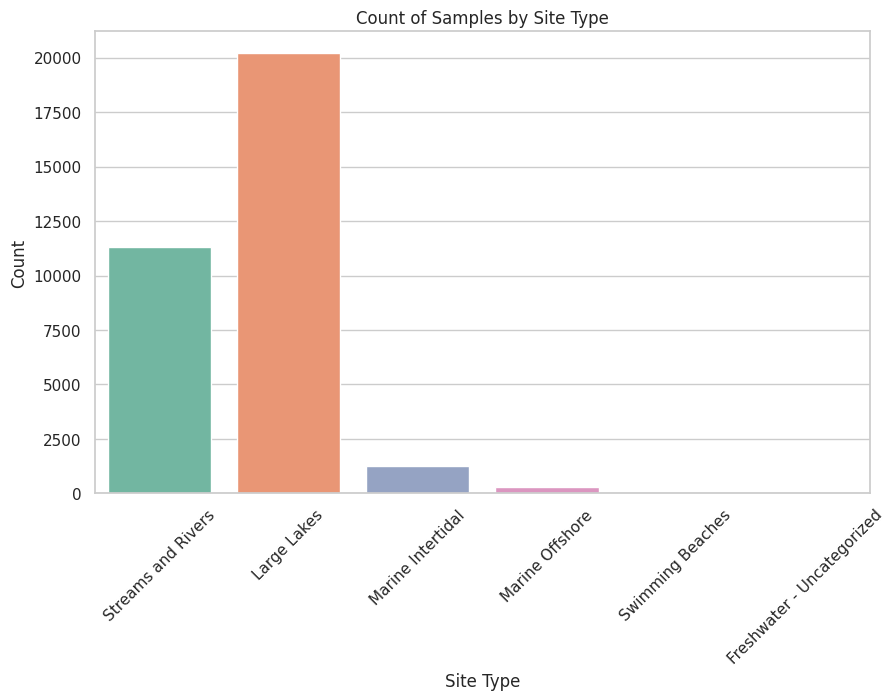

In [9]:
plt.figure(figsize=(10, 6))
sns.countplot(data=data, x='Site Type', palette='Set2')
plt.title('Count of Samples by Site Type')
plt.xlabel('Site Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

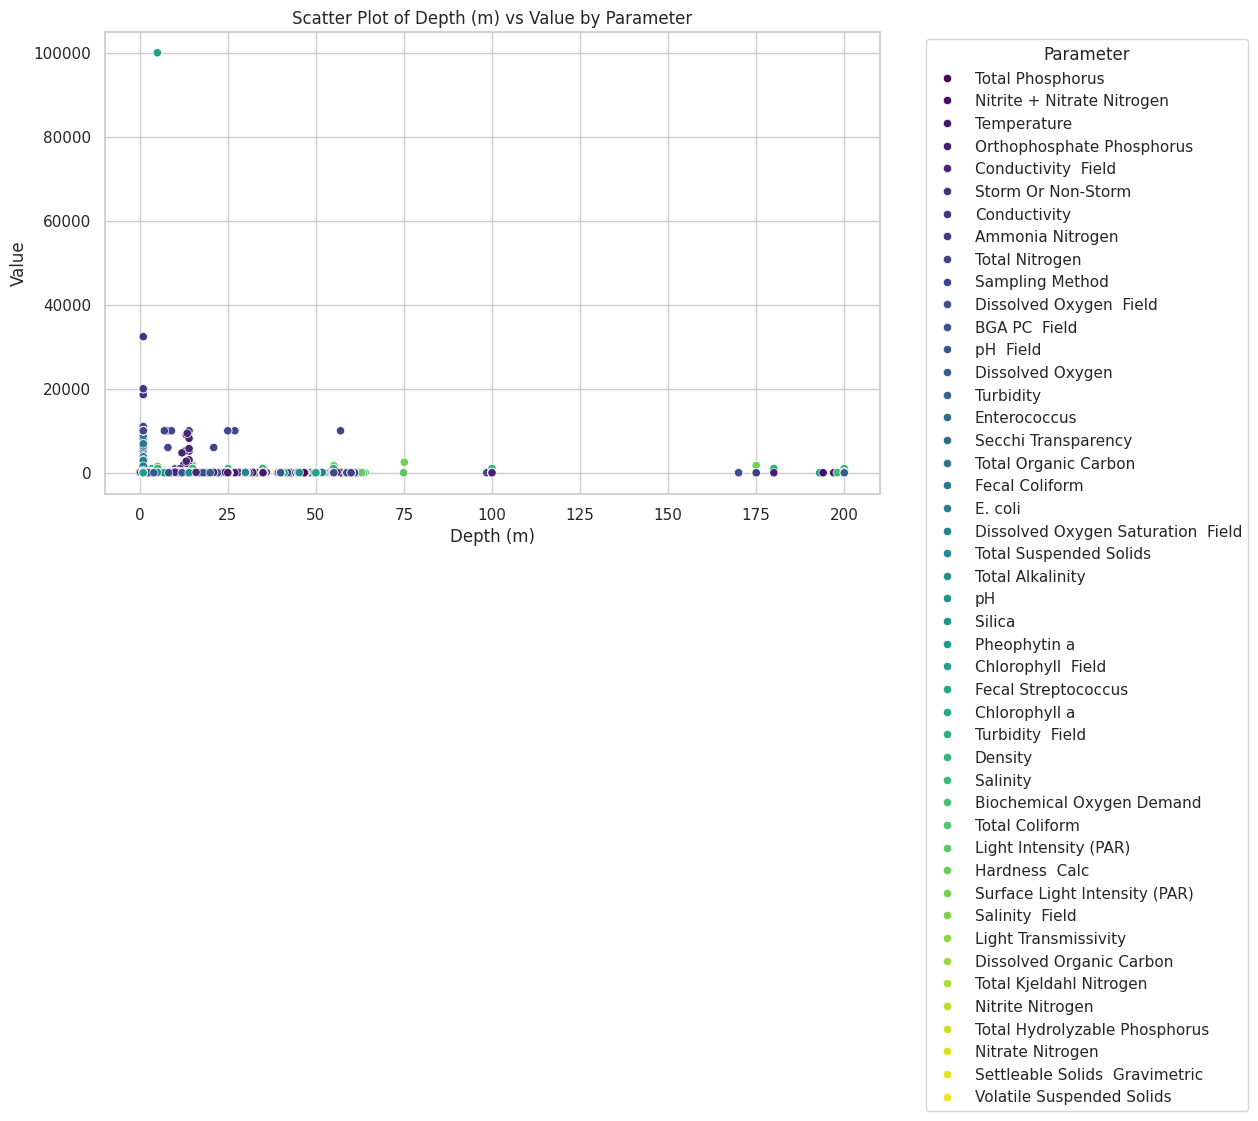

In [10]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='Depth (m)', y='Value', hue='Parameter', palette='viridis')
plt.title('Scatter Plot of Depth (m) vs Value by Parameter')
plt.xlabel('Depth (m)')
plt.ylabel('Value')
plt.legend(title='Parameter', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

<ipython-input-11-2326c0358b5d>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x='Site Type', y='Value', palette='Set3')


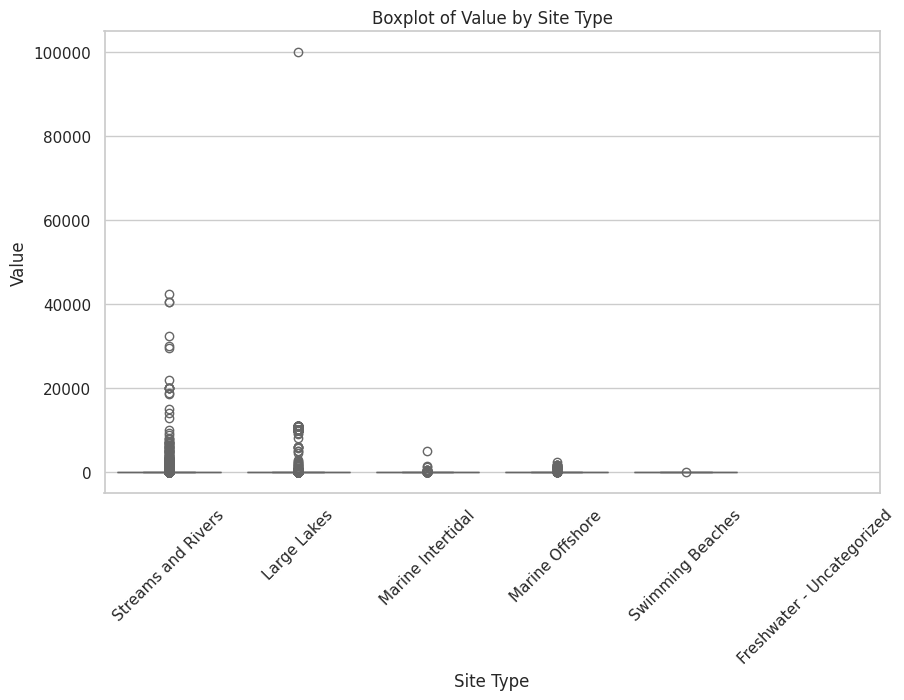

In [11]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=data, x='Site Type', y='Value', palette='Set3')
plt.title('Boxplot of Value by Site Type')
plt.xlabel('Site Type')
plt.ylabel('Value')
plt.xticks(rotation=45)
plt.show()

<ipython-input-12-e2b12844475e>:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=data, x='Parameter', y='Value', palette='Set1', ci=None)
<ipython-input-12-e2b12844475e>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=data, x='Parameter', y='Value', palette='Set1', ci=None)


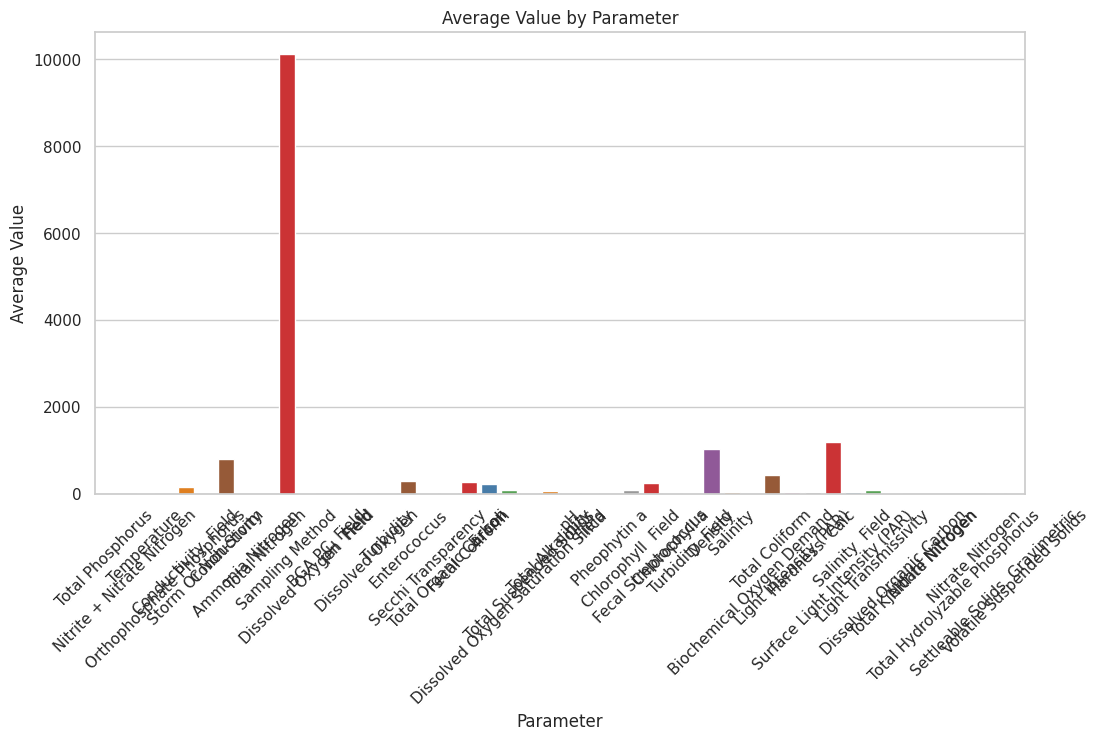

In [12]:
plt.figure(figsize=(12, 6))
sns.barplot(data=data, x='Parameter', y='Value', palette='Set1', ci=None)
plt.title('Average Value by Parameter')
plt.xlabel('Parameter')
plt.ylabel('Average Value')
plt.xticks(rotation=45)
plt.show()

In [21]:
cols_to_remove = ['Lab Qualifier', 'MDL', 'RDL', 'Text Value', 'Sample Info', 'Steward Note', 'Replicates', 'Replicate Of']
water_quality_clean = data.drop(cols_to_remove, axis=1)

In [22]:
water_quality_clean.dtypes

Sample ID             int64
Grab ID             float64
Profile ID            int64
Sample Number        object
Collect DateTime     object
Depth (m)           float64
Site Type            object
Area                 object
Locator              object
Site                 object
Parameter            object
Value               float64
Units                object
QualityId             int64
Method               object
Date Analyzed        object
Data Source          object
dtype: object

In [23]:
water_quality_clean.describe()

,Sample ID,Grab ID,Profile ID,Depth (m),Value,QualityId
count,33117.000000,23357.000000,33117.000000,23357.000000,30296.000000,33117.000000
mean,79072.685207,86478.581453,42171.261286,10.442109,122.458777,1.964459
std,50441.899301,45133.635504,16050.856053,13.959836,1171.074711,0.554309
min,535.000000,700.000000,49.000000,0.000000,0.000000,0.000000
25%,31521.000000,53442.000000,36475.000000,1.000000,0.943000,2.000000
50%,72976.000000,84202.000000,42491.000000,5.400000,7.650000,2.000000
75%,123269.000000,123226.000000,50072.000000,15.000000,23.000000,2.000000
max,182661.000000,182661.000000,78560.000000,200.000000,100000.000000,9.000000


In [26]:
def summary(df):
    print(f'data shape: {df.shape}')
    summ = pd.DataFrame(df.dtypes, columns=['Data Type'])
    summ['Missing#'] = df.isna().sum()
    summ['Missing%'] = (df.isna().sum())/len(df)
    summ['Dups'] = df.duplicated().sum()
    summ['Uniques'] = df.nunique().values
    summ['Count'] = df.count().values

    summ['First Value'] = df.loc[0].values
    summ['Second Value'] = df.loc[1].values
    summ['Third Value'] = df.loc[2].values


    display(summ)

In [28]:
summary(water_quality_clean)

data shape: (33117, 17)


,Data Type,Missing#,Missing%,Dups,Uniques,Count,First Value,Second Value,Third Value
Sample ID,int64,0,0.000000,0,29396,33117,16316,8937,137745
Grab ID,float64,9760,0.294713,0,20920,23357,16316.0,8937.0,137745.0
Profile ID,int64,0,0.000000,0,18270,33117,10702,37688,54368
Sample Number,object,0,0.000000,0,29396,33117,9209019,7915489,L58228-1
Collect DateTime,object,0,0.000000,0,24982,33117,04/13/1992 12:00:00 AM,06/20/1979 12:00:00 AM,06/25/2013 08:09:00 AM
Depth (m),float64,9760,0.294713,0,479,23357,1.0,1.0,1.0
Site Type,object,0,0.000000,0,6,33117,Streams and Rivers,Streams and Rivers,Large Lakes
Area,object,1,0.000030,0,67,33116,Pipers,Crisp,Lake Union/Ship Canal
Locator,object,0,0.000000,0,178,33117,KSHZ06,0321,0512
Site,object,0,0.000000,0,176,33117,Pipers Creek mouth,Crisp Creek mouth at SE Green Valley Rd,Ship Canal above locks
